In [1]:
import torch

print("CUDA available:", torch.cuda.is_available())

print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

CUDA available: True
Current device: 0
Device name: NVIDIA GeForce GTX 1650


In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## 모델이 클래스 특성을 학습하기에 충분한 표본 갯수로 데이터 제거

> Machinery에서 데이터가 30개 이하인 클래스 수: 100
> 
> Assembly에서 데이터가 30개 이하인 클래스 수: 1583
>
> 제거 후, 남은 데이터: 13882, MACHINERY : 62 ASSEMBLY:209

In [3]:
df = pd.read_excel('dataset_supplierfilled.xlsx')

C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


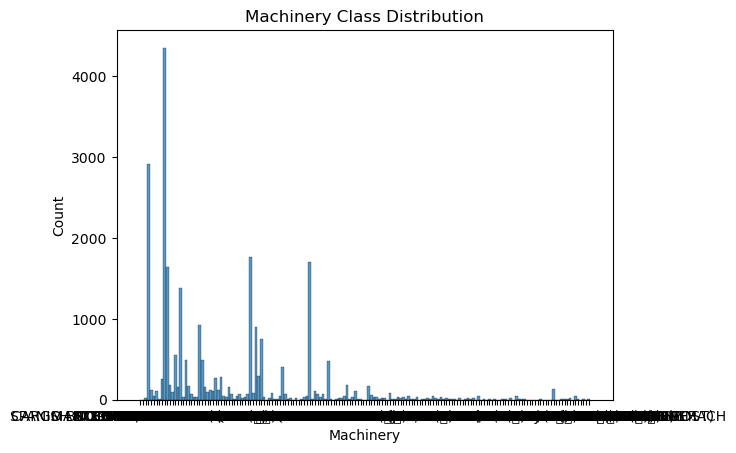

C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) 

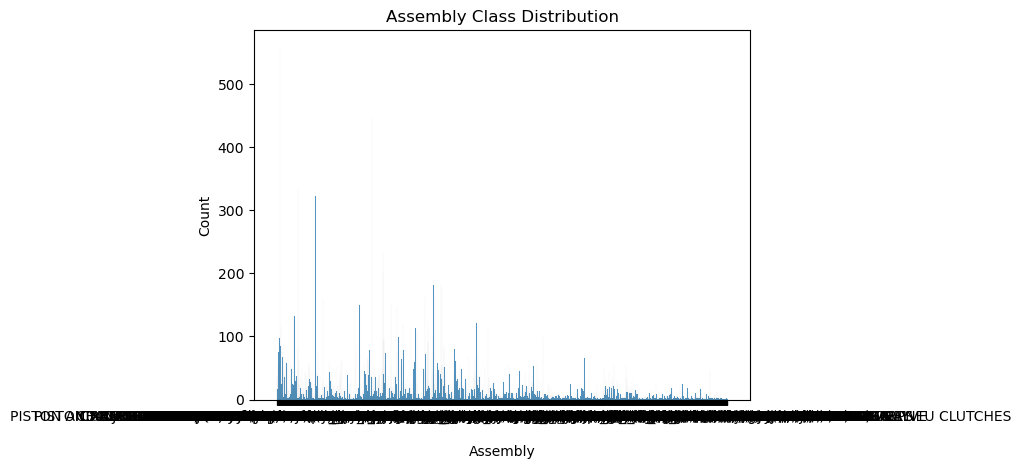

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# machinery 분포 시각화
sns.histplot(df['Machinery'], kde=False, bins=30)
plt.title('Machinery Class Distribution')
plt.show()

# assembly 분포 시각화
sns.histplot(df['Assembly'], kde=False, bins=30)
plt.title('Assembly Class Distribution')
plt.show()

In [5]:
# 각 클래스당 빈도 계산
machinery_counts = df['Machinery'].value_counts()
assembly_counts = df['Assembly'].value_counts()

min_threshold = 30

# 임계값 기준으로 데이터 필터링
df_filtered = df[df['Machinery'].isin(machinery_counts[machinery_counts >= min_threshold].index) &
                 df['Assembly'].isin(assembly_counts[assembly_counts >= min_threshold].index)]

# 남은 데이터 확인
print("남은 데이터:", df_filtered.shape, len(df_filtered['Machinery'].unique()),len(df_filtered['Assembly'].unique()))

남은 데이터: (13882, 32) 62 209


In [6]:
# Machinery에서 상위 90%와 30개 이하 클래스 수 계산
machinery_cumsum = machinery_counts.cumsum() / machinery_counts.sum()
machinery_top_classes = machinery_cumsum[machinery_cumsum <= 0.9].index
machinery_top_class_count = len(machinery_top_classes)
machinery_small_classes = machinery_counts[machinery_counts <= 30].index
machinery_small_class_count = len(machinery_small_classes)

# Assembly에서 상위 90%와 30개 이하 클래스 수 계산
assembly_cumsum = assembly_counts.cumsum() / assembly_counts.sum()
assembly_top_classes = assembly_cumsum[assembly_cumsum <= 0.9].index
assembly_top_class_count = len(assembly_top_classes)
assembly_small_classes = assembly_counts[assembly_counts <= 30].index
assembly_small_class_count = len(assembly_small_classes)

# 결과 출력
print(f"Machinery에서 상위 90% 데이터를 차지하는 클래스 수: {machinery_top_class_count}")
print(f"Assembly에서 상위 90% 데이터를 차지하는 클래스 수: {assembly_top_class_count}")
print(f"Machinery에서 데이터가 30개 이하인 클래스 수: {machinery_small_class_count}")
print(f"Assembly에서 데이터가 30개 이하인 클래스 수: {assembly_small_class_count}")

Machinery에서 상위 90% 데이터를 차지하는 클래스 수: 35
Assembly에서 상위 90% 데이터를 차지하는 클래스 수: 802
Machinery에서 데이터가 30개 이하인 클래스 수: 100
Assembly에서 데이터가 30개 이하인 클래스 수: 1583


In [7]:
data=pd.read_excel('filtered_dataset_30.xlsx')

In [8]:
print(len(data['Machinery'].unique()),len(data['Assembly'].unique()))

62 209


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13882 entries, 0 to 13881
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   청구서번호        13882 non-null  object 
 1   No.          13882 non-null  int64  
 2   Subject      13872 non-null  object 
 3   Machinery    13882 non-null  object 
 4   Assembly     13882 non-null  object 
 5   청구품목         13882 non-null  object 
 6   Unnamed: 6   0 non-null      float64
 7   Part No.1    13881 non-null  object 
 8   Part No.2    2430 non-null   object 
 9   청구량          13818 non-null  float64
 10  견적           13698 non-null  object 
 11  견적수량         13818 non-null  float64
 12  견적화폐         13818 non-null  object 
 13  견적단가         13882 non-null  float64
 14  발주번호         13882 non-null  object 
 15  발주처          13882 non-null  object 
 16  발주           13882 non-null  object 
 17  발주수량         13818 non-null  float64
 18  발주금액         13818 non-null  float64
 19  D/T 

In [10]:
import re

def preprocess_text(text):
    # 괄호 안의 내용 제거
    text = re.sub(r'\([^)]*\)', '', text)  
    # 알파벳, 숫자, 필요한 특수문자 (/, *, -, +, ., ,, #, &, 등)만 허용
    text = re.sub(r'[^\w\s\*/\-\+.,#&]', '', text) 
    # 여러 공백을 언더스코어로 변환
    text = re.sub(r'\s+', '_', text)
    # 텍스트 중간의 연속된 언더스코어를 하나로 줄임
    text = re.sub(r'_+', '_', text) 
    # 불필요한 단어 제거
    text = re.sub(r'\b(사용금지|사)\b', '', text, flags=re.IGNORECASE)
    # 중간에 언더스코어가 불필요하게 남아있는 경우 처리
    text = re.sub(r'(?<!\w)_(?!\w)', '', text)
    # 언더스코어 앞뒤로 존재하는 특수문자 제거
    text = re.sub(r'_([^\w]+)_', '_', text)
    text = re.sub(r'_([^\w]+)$', '', text)
    text = re.sub(r'^([^\w]+)_', '', text)
    # 텍스트 끝부분의 불필요한 언더스코어 제거
    text = re.sub(r'_+$', '', text)
    # 영어 단어는 소문자로 변환
    text = ' '.join([word.lower() if re.match(r'[A-Za-z]', word) else word for word in text.split()])
    text = text.strip()
    return text

def clean_supplier_name(name):
    # 접미사 제거
    suffixes = r'\b(Corp\.?|Corporation|Company|Co\.?|Incorporated|Inc\.?|Limited|Ltd\.?|GmbH|S\.L\.|SDN\. BHD\.)\b'
    name = re.sub(suffixes, '', name, flags=re.IGNORECASE)
    # 특수 문자 제거
    name = re.sub(r'[^\w\s]', '', name)
    # 불필요한 단어 제거
    name = re.sub(r'\b(사용금지|사)\b', '', name, flags=re.IGNORECASE)
    # 공백 정리
    name = re.sub(r'\s+', ' ', name).strip()
    # 오타 수정 및 문자열 정리
    name = re.sub(r'coporation|coropration|coproration|corporration', 'corporation', name, flags=re.IGNORECASE)
    name = name.lower().strip()
    return name

In [11]:
# 각 칼럼 전처리
data['cleaned_item'] = data['청구품목'].apply(preprocess_text)
data['Part No.1'] = data['Part No.1'].astype(str)
data['cleaned_part']=data['Part No.1'].apply(preprocess_text)
data['cleaned_supplier'] = data['발주처'].apply(clean_supplier_name)

# 전처리된 칼럼 결합
data['combined_text'] =data['cleaned_item'].fillna('') + " " + data['cleaned_part'] +  " " + data['cleaned_supplier'].fillna('')


In [12]:
print(data[['combined_text']])

                                           combined_text
0      ge_power_pack_fork_e7 40028340 matsuiusa corpo...
1      ge_power_pack_fork_e7 40028340 matsuiusa corpo...
2      samson_super_strong_double_braid_rope_1_3/4,_3...
3      wire_rope_g6x19_a3_cmp_slpp_28mm_x_400m 6X19X2...
4      wire_rope_g6x19_a3_cmp_slpp_25mm_x_400m 6X19X2...
...                                                  ...
13877       pin-spring 7M-5130 haein corporation_cheonan
13878     kit-bearing 342-2409 haein corporation_cheonan
13879            seal 127-4374 haein corporation_cheonan
13880    sleeve-shaft 206-5967 haein corporation_cheonan
13881  bearing-ball,_6326zzsc3p6 154-3032 haein corpo...

[13882 rows x 1 columns]


In [13]:
from gensim.models import FastText, Word2Vec
import torch

# 문장을 토큰화하여 리스트로 만들어야 합니다.
sentences = [text.split() for text in data['combined_text']]

# FastText 모델 학습
ft_model = FastText(vector_size=120, window=5, min_count=1, min_n=3, max_n=6, sg=1)
ft_model.build_vocab(sentences)
ft_model.train(sentences, total_examples=len(sentences), epochs=10)


(349394, 544110)

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [15]:
# FastText 임베딩을 가져오는 함수 (Word2Vec 제거)
def get_embedding(word, model):
    if word in model.wv:
        return torch.tensor(model.wv[word])
    else:
        # 서브워드 임베딩의 평균을 계산
        subwords = [word[i:j] for i in range(len(word)) for j in range(i+1, len(word)+1)]
        subword_vectors = [model.wv[subword] for subword in subwords if subword in model.wv]
        
        if subword_vectors:
            return torch.tensor(subword_vectors).mean(dim=0)
        else:
            return torch.zeros(model.vector_size)  # 단어가 없는 경우 0 벡터로 처리

# 결합된 임베딩을 생성
combined_embeddings = []
for text in data['combined_text']:
    words = text.split()
    word_vectors = [get_embedding(word, ft_model) for word in words]  # FastText 모델만 사용
    if word_vectors:
        embedding = torch.stack(word_vectors).mean(dim=0)  # 단어 벡터의 평균 계산
    else:
        embedding = torch.zeros(ft_model.vector_size)  # 단어가 없는 경우 0 벡터로 처리
    combined_embeddings.append(embedding)

# 결합된 임베딩 리스트를 텐서로 변환
combined_embeddings_tensor = torch.stack(combined_embeddings)

print(combined_embeddings_tensor.shape)  # 결합된 임베딩 텐서

torch.Size([13882, 120])


In [29]:
import torch
import torch.nn.functional as F

# 모든 단어에 대해 결합된 임베딩을 계산하고 저장
combined_word_vectors = {}
for word in ft_model.wv.index_to_key:  # FastText 모델의 모든 단어에 대해 반복
    combined_word_vectors[word] = get_embedding(word, ft_model)

# 특정 단어와 가장 유사한 단어 5개를 찾는 함수 정의
def find_similar_words(target_word, combined_word_vectors, topn=5):
    if target_word not in combined_word_vectors:
        print(f"Word '{target_word}' not in vocabulary.")
        return []

    target_vector = combined_word_vectors[target_word]
    similarities = {}

    for word, vector in combined_word_vectors.items():
        similarity = F.cosine_similarity(target_vector.unsqueeze(0), vector.unsqueeze(0)).item()
        similarities[word] = similarity

    # 상위 topn개의 유사 단어를 찾음
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    return sorted_similarities[:topn]

In [30]:
# 특정 단어의 유사 단어 찾기
word = "bearing".lower()   # 여기에는 확인하고 싶은 단어를 넣으세요
similar_words = find_similar_words(word, combined_word_vectors, topn=5)

# 결과 출력
print(f"Words most similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

Words most similar to 'bearing':
bearing: 1.0000
kit-bearing: 0.9844
rod_bearing: 0.9809
needel_bearing: 0.9768
bearings: 0.9764


### y 인코딩 fasttext로 변경

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 데이터 준비 및 인코딩
machinery = data['Machinery'].values
processed_machinery_labels = [preprocess_text(label) for label in machinery]

# 결합된 임베딩 텐서를 넘파이 배열로 변환
combined_embeddings_numpy = combined_embeddings_tensor.numpy()

# 넘파이 배열을 X로 지정
X = combined_embeddings_numpy
y = np.array(processed_machinery_labels)

# y 레이블에 대해 FastText 임베딩 학습
y_sentences = [[label] for label in processed_machinery_labels]
ft_model_y = FastText(vector_size=120, window=5, min_count=1, min_n=3, max_n=6, sg=1)
ft_model_y.build_vocab(y_sentences)
ft_model_y.train(y_sentences, total_examples=len(y_sentences), epochs=10)

# 타겟 레이블 임베딩 추출
y_embeddings = np.array([ft_model_y.wv[label] for label in processed_machinery_labels])


# Train-Test Split에서 y_embeddings 사용
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_embeddings, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)


# 입력 데이터와 타겟 데이터를 정규화
X_train_tensor = torch.nn.functional.normalize(X_train_tensor, p=2, dim=1)
y_train_tensor = torch.nn.functional.normalize(y_train_tensor, p=2, dim=1)
X_val_tensor = torch.nn.functional.normalize(X_val_tensor, p=2, dim=1)
y_val_tensor = torch.nn.functional.normalize(y_val_tensor, p=2, dim=1)


In [53]:
# 1. Transformer 모델 정의 (TransformerEncoder 사용)
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, nhead=8, num_encoder_layers=4, dim_feedforward=1024):
        super(TransformerModel, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=input_dim,
            nhead=nhead,
            dim_feedforward=dim_feedforward
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, src):
        # Transformer Encoder 사용
        output = self.transformer_encoder(src)
        output = self.fc(output.mean(dim=1))  # 시퀀스 평균 후 최종 출력
        return output

In [54]:

# 2. 하이퍼파라미터 설정
input_dim = X_train.shape[1]  # FastText 임베딩 차원
output_dim = y_train.shape[1]  # FastText로 임베딩된 y 차원
model = TransformerModel(input_dim=input_dim, output_dim=output_dim)


# 3. 손실 함수 및 옵티마이저 설정
criterion = nn.CosineEmbeddingLoss()  # 코사인 임베딩 로스 사용
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # 학습률 조정


In [55]:

# 4. 학습 루프
num_epochs = 20
target = torch.ones(X_train_tensor.size(0))  # 코사인 유사도 계산을 위한 타겟 값

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # 순전파
    outputs = model(X_train_tensor.unsqueeze(1))  # 시퀀스 길이 추가
    loss = criterion(outputs, y_train_tensor, target)  # Cosine Embedding Loss 사용
    
    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()
    
    # 검증
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor.unsqueeze(1))  # 시퀀스 길이 추가
        val_loss = criterion(val_outputs, y_val_tensor, target[:X_val_tensor.size(0)])  # Cosine Embedding Loss
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Epoch [1/20], Loss: 0.9649, Val Loss: 0.7894
Epoch [2/20], Loss: 0.7874, Val Loss: 0.7143
Epoch [3/20], Loss: 0.7111, Val Loss: 0.6686
Epoch [4/20], Loss: 0.6657, Val Loss: 0.6355
Epoch [5/20], Loss: 0.6344, Val Loss: 0.6074
Epoch [6/20], Loss: 0.6090, Val Loss: 0.5815
Epoch [7/20], Loss: 0.5857, Val Loss: 0.5570
Epoch [8/20], Loss: 0.5637, Val Loss: 0.5318
Epoch [9/20], Loss: 0.5408, Val Loss: 0.5061
Epoch [10/20], Loss: 0.5165, Val Loss: 0.4841
Epoch [11/20], Loss: 0.4954, Val Loss: 0.4668
Epoch [12/20], Loss: 0.4785, Val Loss: 0.4506
Epoch [13/20], Loss: 0.4629, Val Loss: 0.4340
Epoch [14/20], Loss: 0.4468, Val Loss: 0.4189
Epoch [15/20], Loss: 0.4326, Val Loss: 0.4062
Epoch [16/20], Loss: 0.4206, Val Loss: 0.3954
Epoch [17/20], Loss: 0.4107, Val Loss: 0.3856
Epoch [18/20], Loss: 0.4014, Val Loss: 0.3766
Epoch [19/20], Loss: 0.3923, Val Loss: 0.3681
Epoch [20/20], Loss: 0.3842, Val Loss: 0.3601


### y가 정수형이 아닌 고차원 임베딩이므로 accuracy나 precision 볼 수 없어서 코사인 유사도로 측정함

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 5. 최종 검증 성능: 코사인 유사도 및 MSE로 평가
y_pred = model(X_val_tensor.unsqueeze(1)).detach().numpy()

# 코사인 유사도 계산 (예측된 벡터와 실제 벡터 간)
cos_sim = cosine_similarity(y_val_tensor, y_pred)
print(f"Mean Cosine Similarity: {cos_sim.mean():.4f}")

# MSE (Mean Squared Error) 계산
mse = np.mean((y_pred - y_val_tensor.numpy())**2)
print(f"Mean Squared Error: {mse:.4f}")

Mean Cosine Similarity: 0.2121
Mean Squared Error: 0.3672
